In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest, norm
from scipy.stats import levene
from sklearn.preprocessing import PowerTransformer, RobustScaler, MinMaxScaler

In [3]:
df_slope = pd.read_csv(r'C:\Users\1102w\Desktop\대학강의자료\프로젝트\쿠다 심화프로젝트\cluster_results.csv')
df_slope

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,edges_distance,slope,direction,slope_abs,slope_scaled,slope_abs_scaled,cluster,cluster_raw
0,158,163,37.23315,127.10196,37.22841,127.10195,529.4,474.0,upper,474.0,31.682763,32.033852,1,1
1,17,61,37.24878,127.07793,37.24968,127.07794,117.5,90.0,upper,90.0,6.002267,5.934899,2,2
2,132,124,37.26696,127.08238,37.26482,127.08242,238.3,-53.5,ower,53.5,-3.594481,3.454139,0,0
3,132,124,37.26696,127.08238,37.26482,127.08242,238.3,-53.5,ower,53.5,-3.594481,3.454139,0,0
4,132,124,37.26696,127.08238,37.26482,127.08242,238.3,-53.5,ower,53.5,-3.594481,3.454139,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,763,595,37.24294,127.06814,37.24294,127.06832,8.6,0.0,ower,0.0,-0.016599,-0.182043,0,0
1220,508,761,37.24068,127.07251,37.24068,127.07271,27.5,0.0,ower,0.0,-0.016599,-0.182043,0,0
1221,438,439,37.24652,127.06386,37.24652,127.06403,75.7,0.0,ower,0.0,-0.016599,-0.182043,0,0
1222,518,517,37.24045,127.07191,37.24045,127.07273,74.4,0.0,ower,0.0,-0.016599,-0.182043,0,0


In [4]:
df_all = pd.read_csv(r'C:\Users\1102w\Desktop\대학강의자료\프로젝트\쿠다 심화프로젝트\realreal_final_data.csv', encoding='cp949')
df_all

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,street_light,slope_abs,busstop_density_yj,slope_abs_yj,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density
0,755,1,37.24738,127.07600,37.24781,127.07594,68.4,1,0.0,0,1,7.166667,-0.170034,1.713705,-0.278854,0.887696,0.275406,0.75,0.25,0.0
1,479,2,37.24734,127.07548,37.24779,127.07555,51.4,1,0.0,0,2,6.428571,-0.170034,1.666145,0.262196,0.874863,0.412581,0.75,0.25,0.0
2,479,755,37.24734,127.07548,37.24738,127.07600,22.4,1,0.0,0,0,0.076923,-0.170034,-1.313777,-1.365121,0.070745,0.000000,0.75,0.25,0.0
3,1,2,37.24781,127.07594,37.24779,127.07555,36.6,1,0.0,0,0,0.051282,-0.170034,-1.396969,-1.365121,0.048296,0.000000,0.75,0.25,0.0
4,3,1,37.24812,127.07592,37.24781,127.07594,41.2,0,0.0,0,2,15.500000,-0.170034,1.958191,0.262196,0.953670,0.412581,0.25,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,569,570,37.24573,127.06932,37.24558,127.06924,2.7,1,0.0,0,2,1.875000,-0.170034,0.848018,0.262196,0.654095,0.412581,0.75,0.25,0.0
1206,535,540,37.23470,127.06930,37.23452,127.06936,6.5,1,0.0,0,2,3.000000,-0.170034,1.220522,0.262196,0.754613,0.412581,0.75,0.25,0.0
1207,504,612,37.24181,127.07084,37.24164,127.07071,28.9,1,0.0,0,0,1.307692,-0.170034,0.525160,-1.365121,0.566973,0.000000,0.75,0.25,0.0
1208,584,494,37.24510,127.07381,37.24514,127.07403,24.4,1,0.0,0,1,0.181818,-0.170034,-1.010485,-0.278854,0.152587,0.275406,0.75,0.25,0.0


In [5]:
df_slope.describe()

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,edges_distance,slope,slope_abs,slope_scaled,slope_abs_scaled,cluster,cluster_raw
count,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1224.000000,1.224000e+03,1.224000e+03,1224.000000,1224.000000
mean,387.313725,386.299837,37.249397,127.071174,37.249359,127.071276,140.726144,0.248206,2.678438,-4.353816e-18,3.483053e-17,0.020425,0.020425
std,231.996535,231.698547,0.009750,0.009756,0.009745,0.009929,191.867647,14.959094,14.719248,1.000409e+00,1.000409e+00,0.199118,0.199118
min,1.000000,1.000000,37.222110,127.047880,37.222110,127.047880,0.000000,-53.500000,0.000000,-3.594481e+00,-1.820428e-01,0.000000,0.000000
25%,173.750000,170.750000,37.242650,127.064000,37.242670,127.064030,26.575000,-0.615385,0.277778,-5.775371e-02,-1.631634e-01,0.000000,0.000000
50%,397.500000,392.500000,37.248570,127.071600,37.248665,127.071515,86.850000,0.021515,0.721405,-1.516020e-02,-1.330118e-01,0.000000,0.000000
75%,583.250000,589.250000,37.255270,127.076872,37.255180,127.077080,178.775000,0.981714,1.444444,4.905431e-02,-8.386967e-02,0.000000,0.000000
max,795.000000,796.000000,37.275190,127.107910,37.275190,127.107910,2145.100000,474.000000,474.000000,3.168276e+01,3.203385e+01,2.000000,2.000000


In [6]:
df_slope_missing_counts = df_slope.isnull().sum()
print(df_slope_missing_counts)

id_start            0
id_end              0
id_start_lat        0
id_start_long       0
id_end_lat          0
id_end_long         0
edges_distance      0
slope               0
direction           0
slope_abs           0
slope_scaled        0
slope_abs_scaled    0
cluster             0
cluster_raw         0
dtype: int64


In [7]:
df_all.describe()

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,street_light,slope_abs,busstop_density_yj,slope_abs_yj,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,1210.000000,1210.000000,1.210000e+03,1.210000e+03,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1205.000000
mean,392.240496,391.397521,37.249181,127.071004,37.249155,127.071090,138.512893,0.424793,6.126119e+05,0.039669,2.805785,2.137815,1.979613e-10,-1.813520e-11,2.400695e-12,0.425261,0.346106,0.462397,0.269835,3.557250
std,232.120525,231.726658,0.009683,0.009710,0.009697,0.009869,192.642951,0.494516,5.788957e+06,0.195262,4.113903,4.988317,1.000413e+00,1.000413e+00,1.000413e+00,0.269957,0.253640,0.247258,0.097631,45.153340
min,1.000000,1.000000,37.222110,127.047880,37.222110,127.047880,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.700340e-01,-1.575945e+00,-1.365121e+00,0.000000,0.000000,0.250000,0.250000,0.000000
25%,182.250000,181.250000,37.242560,127.063920,37.242655,127.063940,25.800000,0.000000,0.000000e+00,0.000000,0.000000,0.259829,-1.700340e-01,-8.172001e-01,-1.365121e+00,0.204744,0.000000,0.250000,0.250000,0.000000
50%,404.500000,398.500000,37.248440,127.071395,37.248480,127.071210,80.500000,0.000000,0.000000e+00,0.000000,2.000000,0.689272,-1.700340e-01,-6.878898e-02,2.621958e-01,0.406699,0.412581,0.250000,0.250000,0.000000
75%,588.000000,595.000000,37.254895,127.076657,37.254802,127.076960,176.975000,1.000000,0.000000e+00,0.000000,3.000000,1.399174,-1.700340e-01,5.873786e-01,6.091892e-01,0.583763,0.500556,0.750000,0.250000,0.000000
max,795.000000,796.000000,37.275190,127.107910,37.275190,127.107910,2145.100000,1.000000,1.296537e+08,1.000000,41.000000,53.500000,5.881176e+00,2.129883e+00,2.579111e+00,1.000000,1.000000,0.750000,0.750000,1229.938375


In [8]:
df_all_missing_counts = df_all.isnull().sum()
print(df_all_missing_counts)

id_start               0
id_end                 0
id_start_lat           0
id_start_long          0
id_end_lat             0
id_end_long            0
distance               0
crosswalk              0
busstop_density_x      0
bar                    0
street_light           0
slope_abs              0
busstop_density_yj     0
slope_abs_yj           0
street_light_yj        0
slope_abs_scaled       0
street_light_scaled    0
crosswalk_scaled       0
bar_scaled             0
busstop_density        5
dtype: int64


In [9]:
# slope_abs가 결측치인 행 필터링
missing_slope_rows = df_all[df_all['slope_abs'].isnull()]

# id_start와 id_end의 값을 확인
id_start_end_missing = missing_slope_rows[['id_start', 'id_end']]

# 결과 출력
print(id_start_end_missing)

Empty DataFrame
Columns: [id_start, id_end]
Index: []


In [10]:
# 원래 방향으로 slope_abs 값 찾기
original_result = id_start_end_missing.merge(
    df_slope[['id_start', 'id_end', 'slope_abs']],
    on=['id_start', 'id_end'],
    how='left'
)

# id_start와 id_end를 뒤집은 결과로 slope_abs 값 찾기
flipped_ids = id_start_end_missing.rename(columns={'id_start': 'id_end', 'id_end': 'id_start'})
flipped_result = flipped_ids.merge(
    df_slope[['id_start', 'id_end', 'slope_abs']],
    on=['id_start', 'id_end'],
    how='left'
)

# 두 결과를 합치기 (원래 방향과 뒤집힌 방향 모두 포함)
final_result = original_result.copy()
final_result['flipped_slope_abs'] = flipped_result['slope_abs']

# 결과 출력
print(final_result)

Empty DataFrame
Columns: [id_start, id_end, slope_abs, flipped_slope_abs]
Index: []


In [11]:
# 결측치 처리: slope_abs 열의 결측치를 0으로 대체
df_all['slope_abs'] = df_all['slope_abs'].fillna(0)
df_all['busstop_density'] = df_all['busstop_density'].fillna(0)

# 열 이름 변경
df_all = df_all.rename(columns={
    'id_start_위도': 'id_start_lat',
    'id_start_경도': 'id_start_long',
    'id_end_위도' : 'id_end_lat',
    'id_end_경도' : 'id_end_long'
})

# 결과 확인
df_all

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,street_light,slope_abs,busstop_density_yj,slope_abs_yj,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density
0,755,1,37.24738,127.07600,37.24781,127.07594,68.4,1,0.0,0,1,7.166667,-0.170034,1.713705,-0.278854,0.887696,0.275406,0.75,0.25,0.0
1,479,2,37.24734,127.07548,37.24779,127.07555,51.4,1,0.0,0,2,6.428571,-0.170034,1.666145,0.262196,0.874863,0.412581,0.75,0.25,0.0
2,479,755,37.24734,127.07548,37.24738,127.07600,22.4,1,0.0,0,0,0.076923,-0.170034,-1.313777,-1.365121,0.070745,0.000000,0.75,0.25,0.0
3,1,2,37.24781,127.07594,37.24779,127.07555,36.6,1,0.0,0,0,0.051282,-0.170034,-1.396969,-1.365121,0.048296,0.000000,0.75,0.25,0.0
4,3,1,37.24812,127.07592,37.24781,127.07594,41.2,0,0.0,0,2,15.500000,-0.170034,1.958191,0.262196,0.953670,0.412581,0.25,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,569,570,37.24573,127.06932,37.24558,127.06924,2.7,1,0.0,0,2,1.875000,-0.170034,0.848018,0.262196,0.654095,0.412581,0.75,0.25,0.0
1206,535,540,37.23470,127.06930,37.23452,127.06936,6.5,1,0.0,0,2,3.000000,-0.170034,1.220522,0.262196,0.754613,0.412581,0.75,0.25,0.0
1207,504,612,37.24181,127.07084,37.24164,127.07071,28.9,1,0.0,0,0,1.307692,-0.170034,0.525160,-1.365121,0.566973,0.000000,0.75,0.25,0.0
1208,584,494,37.24510,127.07381,37.24514,127.07403,24.4,1,0.0,0,1,0.181818,-0.170034,-1.010485,-0.278854,0.152587,0.275406,0.75,0.25,0.0


In [12]:
# 특정 조건에 따라 slope_abs 값을 0으로 대체
df_all.loc[(df_all['id_start'] == 158) & (df_all['id_end'] == 163), 'slope_abs'] = 0
df_all.loc[(df_all['id_start'] == 17) & (df_all['id_end'] == 61), 'slope_abs'] = 22.75

# distance 열의 값을 모두 1.5로 나눔
df_all['distance'] = 1.2 * df_all['distance'] / 1.5

# 결과 확인
df_all

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,street_light,slope_abs,busstop_density_yj,slope_abs_yj,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density
0,755,1,37.24738,127.07600,37.24781,127.07594,54.72,1,0.0,0,1,7.166667,-0.170034,1.713705,-0.278854,0.887696,0.275406,0.75,0.25,0.0
1,479,2,37.24734,127.07548,37.24779,127.07555,41.12,1,0.0,0,2,6.428571,-0.170034,1.666145,0.262196,0.874863,0.412581,0.75,0.25,0.0
2,479,755,37.24734,127.07548,37.24738,127.07600,17.92,1,0.0,0,0,0.076923,-0.170034,-1.313777,-1.365121,0.070745,0.000000,0.75,0.25,0.0
3,1,2,37.24781,127.07594,37.24779,127.07555,29.28,1,0.0,0,0,0.051282,-0.170034,-1.396969,-1.365121,0.048296,0.000000,0.75,0.25,0.0
4,3,1,37.24812,127.07592,37.24781,127.07594,32.96,0,0.0,0,2,15.500000,-0.170034,1.958191,0.262196,0.953670,0.412581,0.25,0.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,569,570,37.24573,127.06932,37.24558,127.06924,2.16,1,0.0,0,2,1.875000,-0.170034,0.848018,0.262196,0.654095,0.412581,0.75,0.25,0.0
1206,535,540,37.23470,127.06930,37.23452,127.06936,5.20,1,0.0,0,2,3.000000,-0.170034,1.220522,0.262196,0.754613,0.412581,0.75,0.25,0.0
1207,504,612,37.24181,127.07084,37.24164,127.07071,23.12,1,0.0,0,0,1.307692,-0.170034,0.525160,-1.365121,0.566973,0.000000,0.75,0.25,0.0
1208,584,494,37.24510,127.07381,37.24514,127.07403,19.52,1,0.0,0,1,0.181818,-0.170034,-1.010485,-0.278854,0.152587,0.275406,0.75,0.25,0.0


In [13]:
# 데이터프레임을 CSV 파일로 저장
df_all.to_csv('데이터_최종_리얼_전처리전.csv', index=False, encoding='utf-8-sig')

print("데이터가 '데이터_최종_리얼_전처리전.csv'로 저장되었습니다.")


데이터가 '데이터_최종_리얼_전처리전.csv'로 저장되었습니다.


In [14]:
df_all.describe()

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,street_light,slope_abs,busstop_density_yj,slope_abs_yj,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,1210.000000,1210.000000,1.210000e+03,1.210000e+03,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000
mean,392.240496,391.397521,37.249181,127.071004,37.249155,127.071090,110.810314,0.424793,6.126119e+05,0.039669,2.805785,2.137815,1.979613e-10,-1.813520e-11,2.400695e-12,0.425261,0.346106,0.462397,0.269835,3.542551
std,232.120525,231.726658,0.009683,0.009710,0.009697,0.009869,154.114361,0.494516,5.788957e+06,0.195262,4.113903,4.988317,1.000413e+00,1.000413e+00,1.000413e+00,0.269957,0.253640,0.247258,0.097631,45.060452
min,1.000000,1.000000,37.222110,127.047880,37.222110,127.047880,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.700340e-01,-1.575945e+00,-1.365121e+00,0.000000,0.000000,0.250000,0.250000,0.000000
25%,182.250000,181.250000,37.242560,127.063920,37.242655,127.063940,20.640000,0.000000,0.000000e+00,0.000000,0.000000,0.259829,-1.700340e-01,-8.172001e-01,-1.365121e+00,0.204744,0.000000,0.250000,0.250000,0.000000
50%,404.500000,398.500000,37.248440,127.071395,37.248480,127.071210,64.400000,0.000000,0.000000e+00,0.000000,2.000000,0.689272,-1.700340e-01,-6.878898e-02,2.621958e-01,0.406699,0.412581,0.250000,0.250000,0.000000
75%,588.000000,595.000000,37.254895,127.076657,37.254802,127.076960,141.580000,1.000000,0.000000e+00,0.000000,3.000000,1.399174,-1.700340e-01,5.873786e-01,6.091892e-01,0.583763,0.500556,0.750000,0.250000,0.000000
max,795.000000,796.000000,37.275190,127.107910,37.275190,127.107910,1716.080000,1.000000,1.296537e+08,1.000000,41.000000,53.500000,5.881176e+00,2.129883e+00,2.579111e+00,1.000000,1.000000,0.750000,0.750000,1229.938375


C:\Users\1102w\AppData\Local\Temp\ipykernel_22168\3307632013.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_all['bar'], palette='pastel')


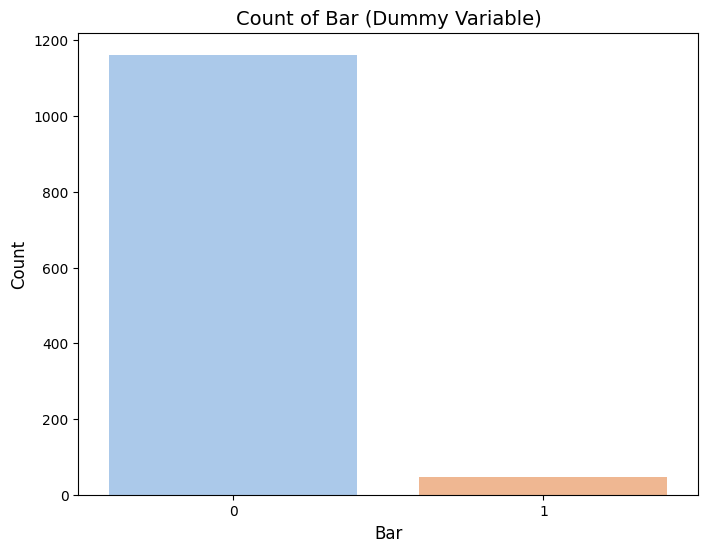

In [15]:
# bar 시각화

# 막대 그래프
plt.figure(figsize=(8, 6))
sns.countplot(x=df_all['bar'], palette='pastel')
plt.xlabel('Bar', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of Bar (Dummy Variable)', fontsize=14)
plt.show()


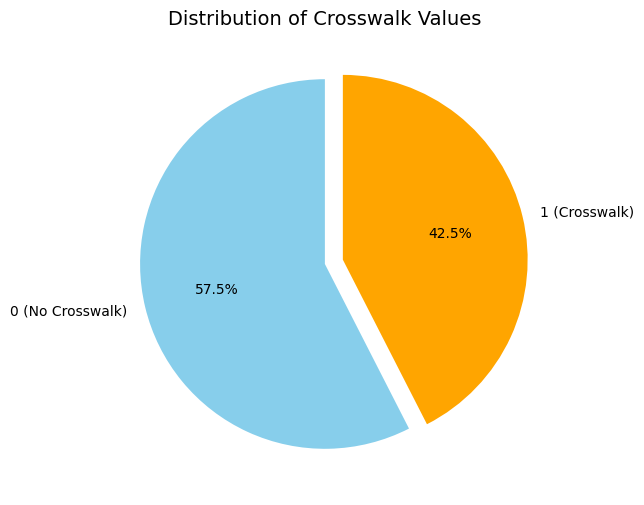

In [16]:
# crosswalk 시각화

# crosswalk 값 개수 세기
crosswalk_counts = df_all['crosswalk'].value_counts()

# 데이터 준비
labels = ['0 (No Crosswalk)', '1 (Crosswalk)']  # 범주 라벨
counts = crosswalk_counts.values  # 값 개수

# 원형 그래프 생성
plt.figure(figsize=(8, 6))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',  # 백분율 표시
    startangle=90,  # 시작 각도
    colors=['skyblue', 'orange'],  # 색상 설정
    explode=(0, 0.1)  # Crosswalk(1)을 약간 강조
)

# 그래프 제목 설정
plt.title('Distribution of Crosswalk Values', fontsize=14)

# 그래프 출력
plt.show()


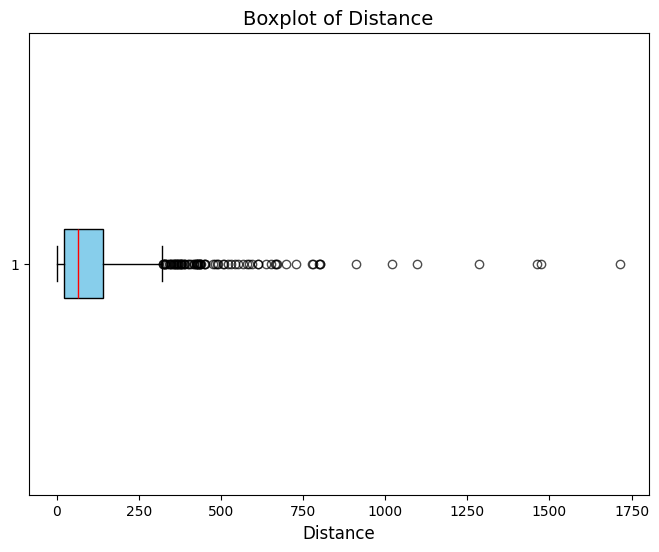

In [17]:
# Distance 시각화

# 박스플롯(Boxplot)으로 이상치 시각화
plt.figure(figsize=(8, 6))
plt.boxplot(df_all['distance'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            flierprops=dict(marker='o', color='black', alpha=0.7))

# 레이블 및 제목
plt.xlabel('Distance', fontsize=12)
plt.title('Boxplot of Distance', fontsize=14)

# 그래프 출력
plt.show()


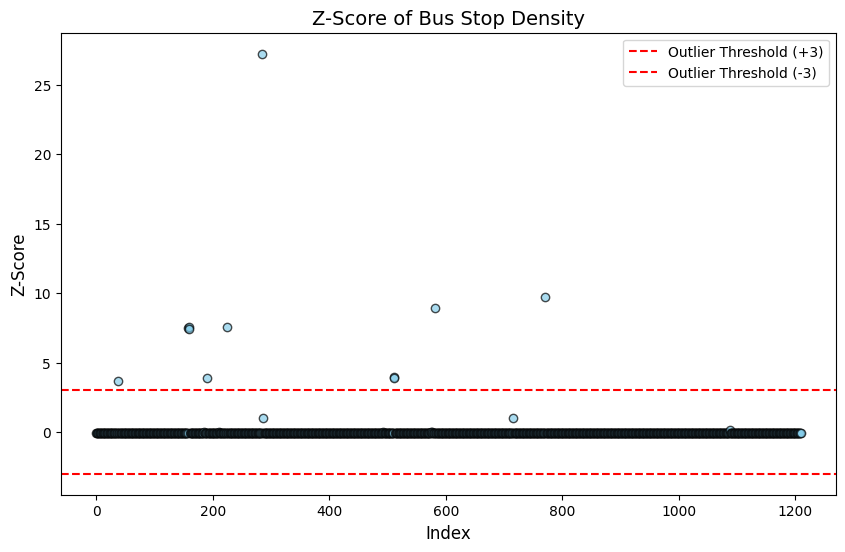

In [18]:
# busstop_density 시각화

# Z-Score 계산
z_scores = (df_all['busstop_density'] - df_all['busstop_density'].mean()) / df_all['busstop_density'].std()

# Z-Score 시각화
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_all)), z_scores, color='skyblue', alpha=0.7, edgecolor='black')
plt.axhline(y=3, color='red', linestyle='--', label='Outlier Threshold (+3)')
plt.axhline(y=-3, color='red', linestyle='--', label='Outlier Threshold (-3)')
plt.xlabel('Index', fontsize=12)
plt.ylabel('Z-Score', fontsize=12)
plt.title('Z-Score of Bus Stop Density', fontsize=14)
plt.legend()
plt.show()

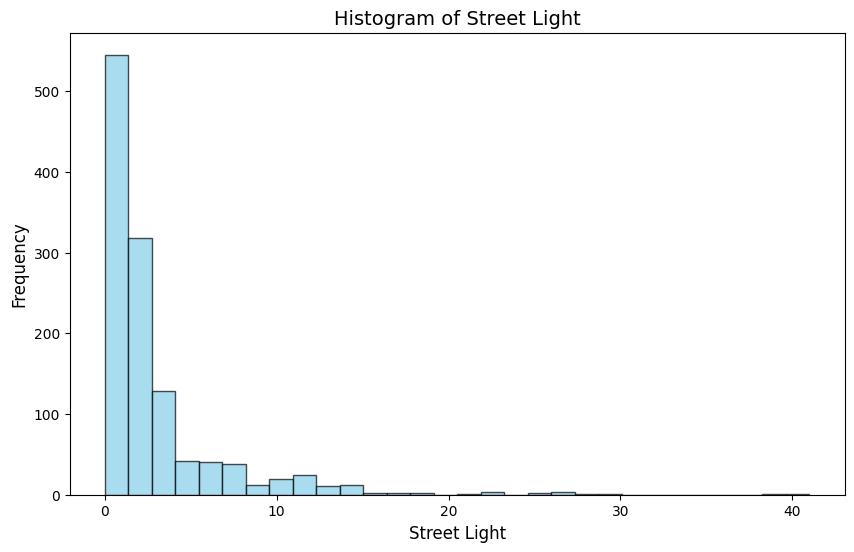

In [19]:
import matplotlib.pyplot as plt

# street_light 데이터 히스토그램
plt.figure(figsize=(10, 6))
plt.hist(df_all['street_light'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# 레이블 및 제목
plt.xlabel('Street Light', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Street Light', fontsize=14)

# 그래프 출력
plt.show()

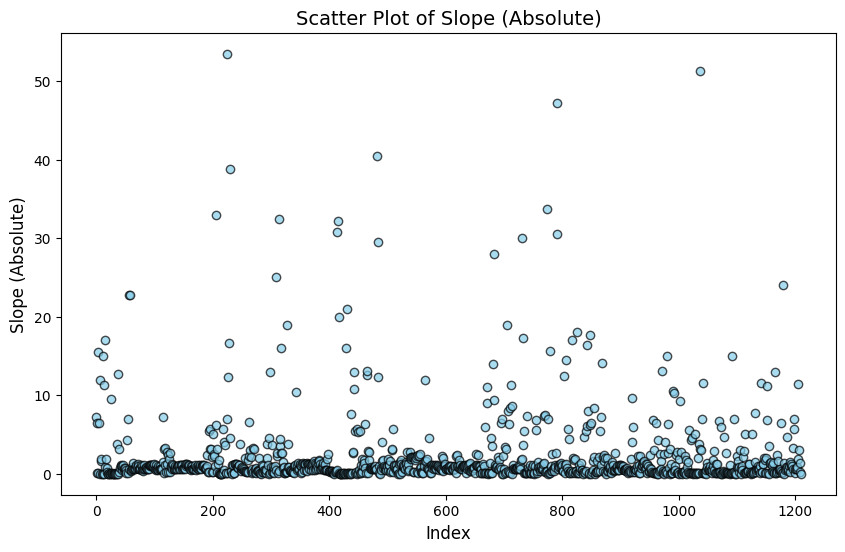

In [20]:
# abs_slope 시각화

# 산점도
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_all)), df_all['slope_abs'], color='skyblue', alpha=0.7, edgecolor='black')

# 레이블 및 제목
plt.xlabel('Index', fontsize=12)
plt.ylabel('Slope (Absolute)', fontsize=12)
plt.title('Scatter Plot of Slope (Absolute)', fontsize=14)

plt.show()

In [21]:
### 데이터 개수가 많으므로 콜모고로프 스미르노프 검정 사용 ###

# 열 선택
columns_to_test = ['busstop_density', 'slope_abs', 'street_light']

# Kolmogorov-Smirnov Test 수행
for col in columns_to_test:
    # 평균과 표준편차 계산
    mean = np.mean(df_all[col])
    std = np.std(df_all[col])

    # K-S Test
    stat, p_value = kstest(df_all[col], 'norm', args=(mean, std))

    # 결과 출력
    print(f"Kolmogorov-Smirnov Test for {col}:")
    print(f"  Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Reject null hypothesis: Data is not normally distributed.")
    else:
        print("  -> Fail to reject null hypothesis: Data is normally distributed.")
    print("-" * 50)


Kolmogorov-Smirnov Test for busstop_density:
  Test Statistic: 0.5140, p-value: 0.0000
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------
Kolmogorov-Smirnov Test for slope_abs:
  Test Statistic: 0.3341, p-value: 0.0000
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------
Kolmogorov-Smirnov Test for street_light:
  Test Statistic: 0.2909, p-value: 0.0000
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------


In [22]:
### 데이터가 정규분포를 따르지 않음이 알려졌으므로 레빈 검정 사용 ###
### weighted sum optimization에서는 각 변수의 값이 최적화에 균형 있게 기여하는 것이 중요함 -> 정규성과 등분산성을 만족시켜야 ###  

# 열 선택
columns_to_test = ['busstop_density', 'slope_abs', 'street_light']

# 1. Levene's Test
levene_results = []
for i in range(len(columns_to_test) - 1):
    for j in range(i + 1, len(columns_to_test)):
        group1 = df_all[columns_to_test[i]]
        group2 = df_all[columns_to_test[j]]
        stat, p_value = levene(group1, group2)
        levene_results.append((columns_to_test[i], columns_to_test[j], stat, p_value))

# Levene's Test 결과 출력
print("Levene’s Test Results:")
for result in levene_results:
    col1, col2, stat, p_value = result
    print(f"Comparing {col1} and {col2}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print("  -> Variances are not equal (Heteroscedasticity detected).")
    else:
        print("  -> Variances are equal (Homoscedasticity holds).")
    print("-" * 50)

Levene’s Test Results:
Comparing busstop_density and slope_abs: Statistic=1.7065, p-value=0.1916
  -> Variances are equal (Homoscedasticity holds).
--------------------------------------------------
Comparing busstop_density and street_light: Statistic=1.0118, p-value=0.3146
  -> Variances are equal (Homoscedasticity holds).
--------------------------------------------------
Comparing slope_abs and street_light: Statistic=5.2210, p-value=0.0224
  -> Variances are not equal (Heteroscedasticity detected).
--------------------------------------------------


In [28]:
# Yeo-Johnson 변환
yj_transformer = PowerTransformer(method='yeo-johnson')
columns_to_transform = ['busstop_density', 'slope_abs', 'street_light']
df_all[[f'{col}_yj' for col in columns_to_transform]] = yj_transformer.fit_transform(df_all[columns_to_transform])

# MinMax Scaling
minmax_scaler = MinMaxScaler()
df_all[[f'{col}_scaled' for col in columns_to_transform]] = minmax_scaler.fit_transform(df_all[[f'{col}_robust' for col in columns_to_transform]])

# 결과 확인
print(df_all[[f'{col}_scaled' for col in columns_to_transform]].head())


   busstop_density_scaled  slope_abs_scaled  street_light_scaled
0                     0.0          0.887696             0.275406
1                     0.0          0.874863             0.412581
2                     0.0          0.070745             0.000000
3                     0.0          0.048296             0.000000
4                     0.0          0.953670             0.412581


In [29]:
### 정규화 돌린 후 재검증 ###

# 열 선택
columns_to_test = ['busstop_density_scaled', 'slope_abs_scaled', 'street_light_scaled']

# Kolmogorov-Smirnov Test 수행
for col in columns_to_test:
    # 평균과 표준편차 계산
    mean = np.mean(df_all[col])
    std = np.std(df_all[col])

    # K-S Test
    stat, p_value = kstest(df_all[col], 'norm', args=(mean, std))

    # 결과 출력
    print(f"Kolmogorov-Smirnov Test for {col}:")
    print(f"  Test Statistic: {stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  -> Reject null hypothesis: Data is not normally distributed.")
    else:
        print("  -> Fail to reject null hypothesis: Data is normally distributed.")
    print("-" * 50)


# 열 선택
columns_to_test = ['busstop_density_scaled', 'slope_abs_scaled', 'street_light_scaled']

# 1. Levene's Test
levene_results = []
for i in range(len(columns_to_test) - 1):
    for j in range(i + 1, len(columns_to_test)):
        group1 = df_all[columns_to_test[i]]
        group2 = df_all[columns_to_test[j]]
        stat, p_value = levene(group1, group2)
        levene_results.append((columns_to_test[i], columns_to_test[j], stat, p_value))

# Levene's Test 결과 출력
print("Levene’s Test Results:")
for result in levene_results:
    col1, col2, stat, p_value = result
    print(f"Comparing {col1} and {col2}: Statistic={stat:.4f}, p-value={p_value:.4f}")
    if p_value < 0.05:
        print("  -> Variances are not equal (Heteroscedasticity detected).")
    else:
        print("  -> Variances are equal (Homoscedasticity holds).")
    print("-" * 50)


Kolmogorov-Smirnov Test for busstop_density_scaled:
  Test Statistic: 0.5355, p-value: 0.0000
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------
Kolmogorov-Smirnov Test for slope_abs_scaled:
  Test Statistic: 0.0575, p-value: 0.0006
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------
Kolmogorov-Smirnov Test for street_light_scaled:
  Test Statistic: 0.1784, p-value: 0.0000
  -> Reject null hypothesis: Data is not normally distributed.
--------------------------------------------------
Levene’s Test Results:
Comparing busstop_density_scaled and slope_abs_scaled: Statistic=1212.2118, p-value=0.0000
  -> Variances are not equal (Heteroscedasticity detected).
--------------------------------------------------
Comparing busstop_density_scaled and street_light_scaled: Statistic=931.0478, p-value=0.0000
  -> Variances are not equal (Heteroscedasticity detected).
-------

In [30]:
df_all.describe()

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,...,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density,busstop_density_robust,slope_abs_robust,street_light_robust,busstop_density_scaled
count,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,...,1.210000e+03,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1210.000000,1.210000e+03,1210.000000,1210.000000
mean,392.240496,391.397521,37.249181,127.071004,37.249155,127.071090,110.810314,0.424793,6.126119e+05,0.039669,...,-3.112295e-16,0.425261,0.346106,0.462397,0.269835,3.542551,0.132898,4.897481e-02,-0.132804,0.017355
std,232.120525,231.726658,0.009683,0.009710,0.009697,0.009869,154.114361,0.494516,5.788957e+06,0.195262,...,1.000413e+00,0.269957,0.253640,0.247258,0.097631,45.060452,1.000413,7.122516e-01,0.506715,0.130645
min,1.000000,1.000000,37.222110,127.047880,37.222110,127.047880,0.000000,0.000000,0.000000e+00,0.000000,...,-1.365121e+00,0.000000,0.000000,0.250000,0.250000,0.000000,0.000000,-1.073031e+00,-0.824246,0.000000
25%,182.250000,181.250000,37.242560,127.063920,37.242655,127.063940,20.640000,0.000000,0.000000e+00,0.000000,...,-1.365121e+00,0.204744,0.000000,0.250000,0.250000,0.000000,0.000000,-5.328367e-01,-0.824246,0.000000
50%,404.500000,398.500000,37.248440,127.071395,37.248480,127.071210,64.400000,0.000000,0.000000e+00,0.000000,...,2.621958e-01,0.406699,0.412581,0.250000,0.250000,0.000000,0.000000,-4.933120e-18,0.000000,0.000000
75%,588.000000,595.000000,37.254895,127.076657,37.254802,127.076960,141.580000,1.000000,0.000000e+00,0.000000,...,6.091892e-01,0.583763,0.500556,0.750000,0.250000,0.000000,0.000000,4.671633e-01,0.175754,0.000000
max,795.000000,796.000000,37.275190,127.107910,37.275190,127.107910,1716.080000,1.000000,1.296537e+08,1.000000,...,2.579111e+00,1.000000,1.000000,0.750000,0.750000,1229.938375,7.657517,1.565360e+00,1.173532,1.000000


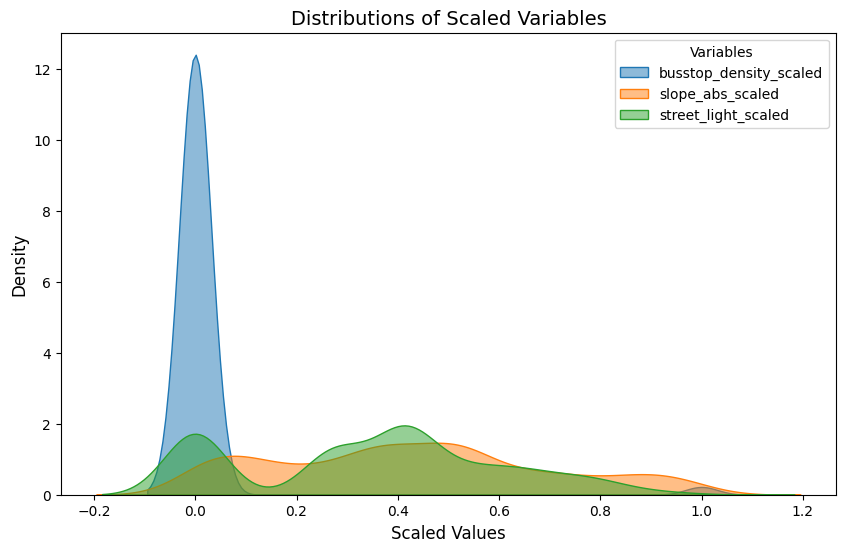

In [31]:
# 열 이름 정의
columns_to_visualize = ['busstop_density_scaled', 'slope_abs_scaled', 'street_light_scaled']

# 한 플롯에 모두 담기
plt.figure(figsize=(10, 6))
for col in columns_to_visualize:
    sns.kdeplot(df_all[col], label=col, fill=True, alpha=0.5)

plt.title('Distributions of Scaled Variables', fontsize=14)
plt.xlabel('Scaled Values', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Variables', fontsize=10)
plt.show()


In [32]:
### 더미변수는 0또는1 -> 다른 연속형 변수에 비해 영향력이 작거나 크지 않도록 조정 필요 ###
### 분위 기반 스케일링을 통해 0을 0.25, 1을 0.75로 치환 ###

# 분위 기반 스케일링 설정 (0 -> 0.25, 1 -> 0.75)
def quantile_based_scaling(dummy_column, lower_bound=0.25, upper_bound=0.75):
    return dummy_column.replace({0: lower_bound, 1: upper_bound})

# 분위 기반 스케일링 적용
df_all['crosswalk_scaled'] = quantile_based_scaling(df_all['crosswalk'], lower_bound=0.25, upper_bound=0.75)
df_all['bar_scaled'] = quantile_based_scaling(df_all['bar'], lower_bound=0.25, upper_bound=0.75)

# 결과 확인
df_all[['crosswalk', 'crosswalk_scaled', 'bar', 'bar_scaled']].head()


,crosswalk,crosswalk_scaled,bar,bar_scaled
0,1,0.75,0,0.25
1,1,0.75,0,0.25
2,1,0.75,0,0.25
3,1,0.75,0,0.25
4,0,0.25,0,0.25


In [ ]:
df_all

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,...,street_light_yj,slope_abs_scaled,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density,busstop_density_robust,slope_abs_robust,street_light_robust,busstop_density_scaled
0,755,1,37.24738,127.07600,37.24781,127.07594,54.72,1,0.0,0,...,-0.278854,0.887696,0.275406,0.75,0.25,0.0,0.0,1.269060,-0.274045,0.0
1,479,2,37.24734,127.07548,37.24779,127.07555,41.12,1,0.0,0,...,0.262196,0.874863,0.412581,0.75,0.25,0.0,0.0,1.235199,0.000000,0.0
2,479,755,37.24734,127.07548,37.24738,127.07600,17.92,1,0.0,0,...,-1.365121,0.070745,0.000000,0.75,0.25,0.0,0.0,-0.886378,-0.824246,0.0
3,1,2,37.24781,127.07594,37.24779,127.07555,29.28,1,0.0,0,...,-1.365121,0.048296,0.000000,0.75,0.25,0.0,0.0,-0.945608,-0.824246,0.0
4,3,1,37.24812,127.07592,37.24781,127.07594,32.96,0,0.0,0,...,0.262196,0.953670,0.412581,0.25,0.25,0.0,0.0,1.443123,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,569,570,37.24573,127.06932,37.24558,127.06924,2.16,1,0.0,0,...,0.262196,0.654095,0.412581,0.75,0.25,0.0,0.0,0.652727,0.000000,0.0
1206,535,540,37.23470,127.06930,37.23452,127.06936,5.20,1,0.0,0,...,0.262196,0.754613,0.412581,0.75,0.25,0.0,0.0,0.917934,0.000000,0.0
1207,504,612,37.24181,127.07084,37.24164,127.07071,23.12,1,0.0,0,...,-1.365121,0.566973,0.000000,0.75,0.25,0.0,0.0,0.422866,-0.824246,0.0
1208,584,494,37.24510,127.07381,37.24514,127.07403,19.52,1,0.0,0,...,-0.278854,0.152587,0.275406,0.75,0.25,0.0,0.0,-0.670448,-0.274045,0.0


In [ ]:
# cost_morning 열 생성
df_all['cost_morning'] = (
    1 * df_all['slope_abs_scaled'] +
    0 * df_all['street_light_scaled'] +
    3 * df_all['crosswalk_scaled'] +
    0 * df_all['bar_scaled'] +
    2 * df_all['busstop_density_scaled']
)

# cost_evening 열 생성
df_all['cost_evening'] = (
    1 * df_all['slope_abs_scaled'] +
    2 * df_all['street_light_scaled'] +
    2 * df_all['crosswalk_scaled'] +
    3 * df_all['bar_scaled'] +
    0 * df_all['busstop_density_scaled']
)

df_all

,id_start,id_end,id_start_lat,id_start_long,id_end_lat,id_end_long,distance,crosswalk,busstop_density_x,bar,...,street_light_scaled,crosswalk_scaled,bar_scaled,busstop_density,busstop_density_robust,slope_abs_robust,street_light_robust,busstop_density_scaled,cost_morning,cost_evening
0,755,1,37.24738,127.07600,37.24781,127.07594,54.72,1,0.0,0,...,0.275406,0.75,0.25,0.0,0.0,1.269060,-0.274045,0.0,3.137696,3.688509
1,479,2,37.24734,127.07548,37.24779,127.07555,41.12,1,0.0,0,...,0.412581,0.75,0.25,0.0,0.0,1.235199,0.000000,0.0,3.124863,3.950025
2,479,755,37.24734,127.07548,37.24738,127.07600,17.92,1,0.0,0,...,0.000000,0.75,0.25,0.0,0.0,-0.886378,-0.824246,0.0,2.320745,2.320745
3,1,2,37.24781,127.07594,37.24779,127.07555,29.28,1,0.0,0,...,0.000000,0.75,0.25,0.0,0.0,-0.945608,-0.824246,0.0,2.298296,2.298296
4,3,1,37.24812,127.07592,37.24781,127.07594,32.96,0,0.0,0,...,0.412581,0.25,0.25,0.0,0.0,1.443123,0.000000,0.0,1.703670,3.028833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,569,570,37.24573,127.06932,37.24558,127.06924,2.16,1,0.0,0,...,0.412581,0.75,0.25,0.0,0.0,0.652727,0.000000,0.0,2.904095,3.729258
1206,535,540,37.23470,127.06930,37.23452,127.06936,5.20,1,0.0,0,...,0.412581,0.75,0.25,0.0,0.0,0.917934,0.000000,0.0,3.004613,3.829776
1207,504,612,37.24181,127.07084,37.24164,127.07071,23.12,1,0.0,0,...,0.000000,0.75,0.25,0.0,0.0,0.422866,-0.824246,0.0,2.816973,2.816973
1208,584,494,37.24510,127.07381,37.24514,127.07403,19.52,1,0.0,0,...,0.275406,0.75,0.25,0.0,0.0,-0.670448,-0.274045,0.0,2.402587,2.953399


In [ ]:
# 데이터프레임을 CSV 파일로 저장
output_file_path = "데이터_전처리_완료.csv"
df_all.to_csv(output_file_path, index=False, encoding='utf-8-sig')

# 저장 경로 확인
print(f"DataFrame has been saved to {output_file_path}.")

DataFrame has been saved to 데이터_전처리_완료.csv.


In [ ]:
# 버스정류장 혼잡도 데이터 병합

# Load the files
original_file = 'C:/Users/pjy03/OneDrive/바탕 화면/university/KHUDA/심화프로젝트/데이터_전처리_완료.csv'
plus_file = 'C:/Users/pjy03/OneDrive/바탕 화면/university/KHUDA/심화프로젝트/혼잡정류장/busstop_real_final.csv'

# Load the CSV files into dataframes
original_df = pd.read_csv(original_file, encoding='cp949')
plus_df = pd.read_csv(plus_file, encoding='cp949')

# Merge the dataframes on 'id_start' and 'id_end'
merged_df =pd.merge(original_df, plus_df[['id_start', 'id_end', '병합하고자 하는 열 이름']],  
                     on=['id_start', 'id_end'], how='left')

# Save the merged data to a file
output_path = 'C:/Users/pjy03/OneDrive/바탕 화면/university/KHUDA/심화프로젝트/data_merge/realreal_final.csv'
merged_df.to_csv(output_path, index=False, encoding='cp949')